# A1.1 Linear Regression with SGD

* A1.1: *Added preliminary grading script in last cells of notebook.*

In this assignment, you will implement three functions `train`, `use`, and `rmse` and apply them to some weather data.
Here are the specifications for these functions, which you must satisfy.

`model = train(X, T, learning_rate, n_epochs, verbose)`
* `X`: is an $N$ x $D$ matrix of input data samples, one per row. $N$ is the number of samples and $D$ is the number of variable values in
each sample.
* `T`: is an $N$ x $K$ matrix of desired target values for each sample.  $K$ is the number of output values you want to predict for each sample.
* `learning_rate`: is a scalar that controls the step size of each update to the weight values.
* `n_epochs`: is the number of epochs, or passes, through all $N$ samples, to take while updating the weight values.
* `verbose`: is True or False (default value) to control whether or not occasional text is printed to show the training progress.
* `model`: is the returned value, which must be a dictionary with the keys `'w'`, `'Xmeans'`, `'Xstds'`, `'Tmeans'` and `'Tstds'`.

`Y = use(X, model)`
* `X`: is an $N$ x $D$ matrix of input data samples, one per row, for which you want to predict the target values.
* `model`: is the dictionary returned by `train`.
* `Y`: is the returned $N$ x $K$ matrix of predicted values, one for each sample in `X`.

`result = rmse(Y, T)`
* `Y`: is an $N$ x $K$ matrix of predictions produced by `use`.
* `T`: is the $N$ x $K$ matrix of target values.
* `result`: is a scalar calculated as the square root of the mean of the squared differences between each sample (row) in `Y` and `T`.

To get you started, here are the standard imports we need.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## 60 points: 40 for train, 10 for use, 10 for rmse

Now here is a start at defining the `train`, `use`, and `rmse`
functions.  Fill in the correct code wherever you see `. . .` with
one or more lines of code.

In [35]:
def train(X, T, learning_rate, n_epochs, verbose=False):
    

    # Calculate means and standard deviations of each column in X and T
    Xmeans = np.mean(X, axis=0)
    Xstds = np.std(X, axis=0)
    Tmeans = np.mean(T, axis=0)
    Tstds = np.std(T, axis=0)
    
    # Use the means and standard deviations to standardize X and T
    X = (X - Xmeans) / Xstds
    T = (T - Tmeans) / Tstds

    # Insert the column of constant 1's as a new initial column in X
    
    X = np.insert(X, 0, 1, axis=1)
    
    # Initialize weights to be a numpy array of the correct shape and all zeros values.
    w = np.zeros((X.shape[1], 1))
    

    for epoch in range(n_epochs):
        sqerror_sum = 0
        n_samples = X.shape[0]

        for n in range(n_samples):

            # Use current weight values to predict output for sample n, then
            # calculate the error, and
            # update the weight values.
            # [n:n+1, :] this grabs all the columns at row n, where the row is an individual sample
            predicted = X[n:n+1, :] @ w
            error = T[n:n+1, :] - predicted
            #update the weight vector
            w += learning_rate * X[n:n+1, :].T * error
            
            # Add the squared error to sqerror_sum
            # square the error and add it to sqerror_sum
            sqerror_sum += (error **2)
            
        if verbose and (n_epochs < 11 or (epoch + 1) % (n_epochs // 10) == 0):
            rmse = np.sqrt(sqerror_sum / n_samples)
            rmse = rmse[0, 0]  # because rmse is 1x1 matrix
            print(f'Epoch {epoch + 1} RMSE {rmse:.2f}')

    return {'w': w, 'Xmeans': Xmeans, 'Xstds': Xstds,
            'Tmeans': Tmeans, 'Tstds': Tstds}

In [36]:
def use(X, model):
    # Standardize X using Xmeans and Xstds in model
    X = (X - model['Xmeans']) / model['Xstds']
    
    # Predict output values using weights in model
    '''w = np.array(list(model['w']))
    print("w: ", X.shape, w.T.shape)
    predicted = X @ w.T'''
    w = np.array(list(model['w']))[1:]
    
    predicted = X @ w
    
    # Unstandardize the predicted output values using Tmeans and Tstds in model
    predicted = (predicted * model['Tstds']) + model['Tmeans']
    # Return the unstandardized output values
    return predicted
    '''return predicted[:,1:]'''

In [37]:
def rmse(A, B):
    return np.sqrt( np.mean((A - B)**2))

Here is a simple example use of your functions to help you debug them.  Your functions must produce the same results.

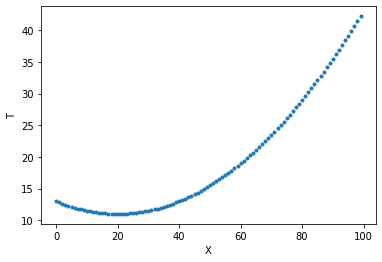

In [38]:
X = np.arange(0, 100).reshape(-1, 1)  # make X a 100 x 1 matrix
T = 0.5 + 0.3 * X + 0.005 * (X - 50) ** 2
plt.plot(X, T, '.')
plt.xlabel('X')
plt.ylabel('T');

In [39]:
print("before train(): ", X.shape)
model = train(X, T, 0.01, 50, verbose=True)
print("after train(): ", X.shape)
model

before train():  (100, 1)
Epoch 5 RMSE 0.40
Epoch 10 RMSE 0.40
Epoch 15 RMSE 0.40
Epoch 20 RMSE 0.40
Epoch 25 RMSE 0.40
Epoch 30 RMSE 0.40
Epoch 35 RMSE 0.40
Epoch 40 RMSE 0.40
Epoch 45 RMSE 0.40
Epoch 50 RMSE 0.40
after train():  (100, 1)


{'Tmeans': array([19.5175]),
 'Tstds': array([9.29491938]),
 'Xmeans': array([49.5]),
 'Xstds': array([28.86607005]),
 'w': array([[-0.00576098],
        [ 1.05433338]])}

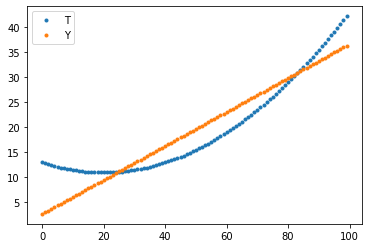

In [40]:
Y = use(X, model)
plt.plot(T, '.', label='T')
plt.plot(Y, '.', label='Y')
plt.legend()

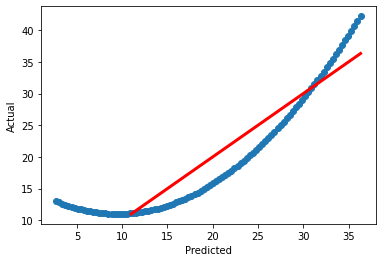

In [41]:
plt.plot(Y[:, 0], T[:, 0], 'o')
plt.xlabel('Predicted')
plt.ylabel('Actual')
a = max(min(Y[:, 0]), min(T[:, 0]))
b = min(max(Y[:, 0]), max(T[:, 0]))
plt.plot([a, b], [a, b], 'r', linewidth=3)

## Weather Data

Now that your functions are working, we can apply them to some real data. We will use data
from  [CSU's CoAgMet Station Daily Data Access](http://coagmet.colostate.edu/cgi-bin/dailydata_form.pl).

You can get the data file [here](http://www.cs.colostate.edu/~cs445/notebooks/A1_data.txt)

## 5 points:

Read in the data into variable `df` using `pandas.read_csv` like we did in lecture notes.
Missing values in this dataset are indicated by the string `'***'`.

In [42]:
df = pd.read_csv('A1_data.txt', delim_whitespace=True, na_values='***')
df

,Year,Mo,Dy,tave,tmax,mxtm,tmin,mntm,vp,rhmax,rhmxtm,rhmin,rhmntm,sr,wrun,pp,st5mx,st5mxtm,st5mn,st5mntm,st15mx,st15mxtm,st15mn,st15mntm,volts,year,gust,gusttm,gusdir,etr_asce
0,2019,1,1,-13.535,-10.073,14:10,-16.997,23:50,0.153,0.830,05:10,0.595,15:00,5.319,62.924,0.000,NaN,NaN,NaN,NaN,-1.803,00:00,-3.195,23:00,NaN,2019.0,5.155,08:10,NaN,0.324
1,2019,1,2,-5.791,6.010,14:50,-17.591,04:00,0.209,0.839,04:20,0.216,15:10,7.388,27.234,0.508,NaN,NaN,NaN,NaN,-2.941,19:00,-4.802,11:00,NaN,2019.0,4.332,11:50,NaN,0.521
2,2019,1,3,1.374,13.444,13:50,-10.696,05:00,0.340,0.836,01:50,0.175,13:30,6.529,28.465,0.000,NaN,NaN,NaN,NaN,-1.979,22:00,-4.639,10:00,NaN,2019.0,4.096,15:40,NaN,0.729
3,2019,1,4,4.544,15.089,14:40,-6.000,06:00,0.429,0.815,06:00,0.202,14:30,6.202,36.616,0.000,NaN,NaN,NaN,NaN,-0.963,23:00,-2.768,10:00,NaN,2019.0,4.096,12:30,NaN,0.893
4,2019,1,5,4.465,14.441,12:50,-5.510,06:40,0.399,0.769,06:50,0.184,14:00,5.931,34.283,0.000,NaN,NaN,NaN,NaN,-0.350,23:00,-1.401,11:00,NaN,2019.0,4.077,12:20,NaN,0.867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019,12,27,-1.493,2.260,14:40,-5.245,07:30,0.403,0.908,21:20,0.565,10:30,4.255,34.897,0.000,NaN,NaN,NaN,NaN,0.308,06:00,0.257,14:00,NaN,2019.0,4.469,16:00,NaN,0.473
361,2019,12,28,-2.695,-1.102,01:50,-4.288,07:00,0.363,0.973,04:00,0.477,22:30,2.994,108.310,0.000,NaN,NaN,NaN,NaN,0.298,20:00,0.264,10:00,NaN,2019.0,10.623,12:20,NaN,0.681
362,2019,12,29,-3.731,1.871,13:30,-9.333,22:40,0.221,0.690,22:50,0.267,15:50,5.551,104.831,4.064,NaN,NaN,NaN,NaN,0.288,00:00,0.219,23:00,NaN,2019.0,11.486,07:10,NaN,1.039
363,2019,12,30,-5.427,1.293,13:40,-12.147,06:20,0.226,0.833,06:50,0.278,12:00,6.694,36.863,0.508,NaN,NaN,NaN,NaN,0.200,00:00,-0.150,23:00,NaN,2019.0,4.586,14:30,NaN,0.504


## 5 points:

Check for missing values by showing the number of NA values, as shown in lecture notes.

In [43]:
df.isna().sum()

Year          0
Mo            0
Dy            0
tave          0
tmax          0
mxtm          0
tmin          0
mntm          0
vp            0
rhmax         0
rhmxtm        0
rhmin         0
rhmntm        0
sr            0
wrun          0
pp            0
st5mx       211
st5mxtm     211
st5mn       211
st5mntm     211
st15mx        0
st15mxtm      0
st15mn        0
st15mntm      0
volts       365
year          0
gust          0
gusttm        0
gusdir      365
etr_asce      0
dtype: int64

## 5 points:

If there are missing values, remove either samples or features that contain missing values. Prove that you
were successful by counting the number of missing values now, which should be zero.

In [44]:
df = df.dropna(axis='columns')
df.isna().sum()

Year        0
Mo          0
Dy          0
tave        0
tmax        0
mxtm        0
tmin        0
mntm        0
vp          0
rhmax       0
rhmxtm      0
rhmin       0
rhmntm      0
sr          0
wrun        0
pp          0
st15mx      0
st15mxtm    0
st15mn      0
st15mntm    0
year        0
gust        0
gusttm      0
etr_asce    0
dtype: int64

Your job is now to create a linear model that predicts the next day's average temperature (tave) from the previous day's values. A discription of all features can be found [here](https://coagmet.colostate.edu/rawdata_docs.php). To start, consider just focusing on these features: 
1. tave: average temperature
2. tmax: maximum temperature
3. tmin: minimum temperature
4. vp: vapor pressure
5. rhmax: maximum relative humidity
6. rhmin: minimum relative humidity
7. pp: precipitation
8. gust: wind gust speed

First, modify the datafile to add a new column: 'next tave' -- here's a hint on your X and T vectors names:

In [45]:
Xnames = ['tave', 'tmax', 'tmin', 'vp', 'rhmax', 'rhmin', 'pp', 'gust']
Tnames = ['next tave']

## 5 points:

Now select those eight columns from `df` and convert the result to a `numpy` array.  (Easier than it sounds.)
Then assign `X` to be all columns and all but the last row.  Assign `T` to be just the first column (tave) and all but the first sample.  So now the first row (sample) in `X` is associated with the first row (sample) in `T` which tave for the following day.

In [46]:
# grab the 8 columns above
df = df[Xnames]
X = np.array(df)
T = X[1:,0].reshape(X.shape[0]-1, 1)
X = X[:-1, :]



## 15 points:

Use the function `train` to train a model for the `X`
and `T` data.  Run it several times with different `learning_rate`
and `n_epochs` values to produce decreasing errors. Use the `use`
function and plots of `T` versus predicted `Y` values to show how
well the model is working.  Type your observations of the plot and of the value of `rmse` to discuss how well the model succeeds.

Below I have 7 of the 20+ models I ran with different hyperparamters. The one that is not commented out resulted in the lowest RMSE. I wanted to grasp most conditions by doing a descending learning rate and an ascending epoch, so that each model would find the lowest RMSE where it bottomed out and no longer became better. I could have automated this with for loops but fealt that it was not needed since the training of this model is very quick and it will not really reach a lower RMSE value without overfitting the data.

Epoch 500 RMSE 0.57
Epoch 1000 RMSE 0.41
Epoch 1500 RMSE 0.36
Epoch 2000 RMSE 0.35
Epoch 2500 RMSE 0.34
Epoch 3000 RMSE 0.34
Epoch 3500 RMSE 0.34
Epoch 4000 RMSE 0.33
Epoch 4500 RMSE 0.33
Epoch 5000 RMSE 0.33


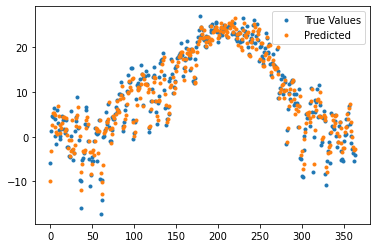

In [75]:
#weatherModel1 = train(X, T, 0.01, 3, verbose=True)
#weatherModel1 = train(X, T, 0.001, 8, verbose=True)
#weatherModel1 = train(X, T, 0.0001, 25, verbose=True)
#weatherModel1 = train(X, T, 0.00008, 30, verbose=True)
#weatherModel1 = train(X, T, 0.00001, 220, verbose=True)
weatherModel1 = train(X, T, 0.000001, 5000, verbose=True)
#weatherModel1 = train(X, T, 0.0000001, 20000, verbose=True)

predicted = use(X, weatherModel1)
plt.plot(T, '.', label='True Values')
plt.plot(predicted, '.', label='Predicted')
plt.legend()


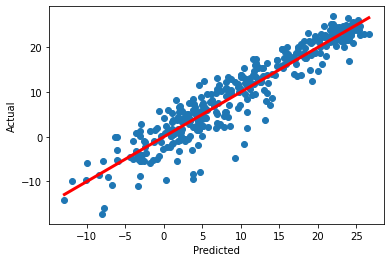

In [76]:
plt.plot(predicted[:, 0], T[:, 0], 'o')
plt.xlabel('Predicted')
plt.ylabel('Actual')
a = max(min(predicted[:, 0]), min(T[:, 0]))
b = min(max(predicted[:, 0]), max(T[:, 0]))
plt.plot([a, b], [a, b], 'r', linewidth=3)

In [77]:
print("Weather Model RMSE:", rmse(predicted, T))

Weather Model RMSE: 3.3330048782223787


The model performs fairly well in my opinion. We are achieving a RMSE of 3.4, which is low considering we are predicting temperatures. If you take a look at the second plot (with the red line), you will see a x to y relation that is very linear. A RMSE of 0 would result in all the blue dots being on the red line. However, that is not very realistic and we have the majority of our data points centered very close to the line and in a linear fashion. This bodes well that our model is going to be fairly successful in predicting the weather. This could be better.

## 5 points:

Print the weight values in the resulting model along with their corresponding variable names (in `Xnames`). Use the relative magnitude
of the weight values to discuss which input variables are most significant in predicting the changes in the tave values.

In [30]:
weights = np.array((weatherModel1['w'][1:]))
weightDF = pd.DataFrame(weights).T
weightDF.columns = Xnames
weightDF

,tave,tmax,tmin,vp,rhmax,rhmin,pp,gust
0,0.229322,0.220886,0.22676,0.226832,-0.011076,-0.070691,0.004483,-0.033154


Using the current day's features to predict the next day's features resulted us with 4 features that are most significant in predicing the changes in tave values. The 'tave' or 'average temperature' for that day is the most significant, 'tmin' and 'vp' are very close second and thirds. The 4th most significant is 'tmax'. I was most surprised that precipitation (pp) did not result in a higher weight value. I took an atmospheric science class and the amount of precipitation and water vapor pressure could have significant affects on the temperature. Interesting to see that vapor pressure is far more significant in this model than percipitation.

## Grading and Check-in

Your notebook will be partially graded automatically.  You can test this grading process yourself by downloading [A1grader.zip](https://www.cs.colostate.edu/~cs445/notebooks/A1grader.zip) and extract `A1grader.py` parallel to this notebook.  Run the code in the in the following cell to see an example grading run.  If your functions are defined correctly, you should see a score of 60/60.  The remaining 40 points are based on testing other data and your discussion.

In [ ]:
#%run -i A1grader.py

A different but similar grading script will be used to grade yout checked-in notebook.  It will include different tests.

You must name your notebook as `Lastname-A1.ipynb` with `Lastname` being your last name, and then save this notebook and check it in at the A1 assignment link in our Canvas web page.

## Extra Credit: 1 point

A typical problem when predicting the next value in a time series is
that the best solution may be to predict the previous value.  The
predicted value will look a lot like the input tave value shifted on
time step later.

To do better, try predicting the change in tave from one day to the next. `T` can be assigned as

In [ ]:
#T = data[1:, 0:1] -  data[:-1, 0:1]

Now repeat the training experiments to pick good `learning_rate` and
`n_epochs`.  Use predicted values to produce next day tave values by
adding the predicted values to the previous day's tave.  Use `rmse`
to determine if this way of predicting next tave is better than
directly predicting tave.

Epoch 3 RMSE 0.98
Epoch 6 RMSE 0.97
Epoch 9 RMSE 0.96
Epoch 12 RMSE 0.96
Epoch 15 RMSE 0.95
Epoch 18 RMSE 0.95
Epoch 21 RMSE 0.95
Epoch 24 RMSE 0.94
Epoch 27 RMSE 0.94
Epoch 30 RMSE 0.94


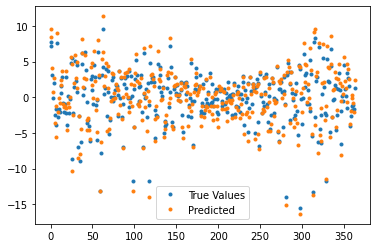

In [81]:
df = pd.read_csv('A1_data.txt', delim_whitespace=True, na_values='***')
df = df.dropna(axis='columns')
Xnames = ['tave', 'tmax', 'tmin', 'vp', 'rhmax', 'rhmin', 'pp', 'gust']
Tnames = ['next tave']
df = df[Xnames]
X = np.array(df)
T = X[1:, 0:1] -  X[:-1, 0:1]
X = X[:-1, :]
weatherModel1 = train(X, T, 0.00008, 30, verbose=True)
predicted = use(X, weatherModel1)
predicted += T
plt.plot(T, '.', label='True Values')
plt.plot(predicted, '.', label='Predicted')
plt.legend()

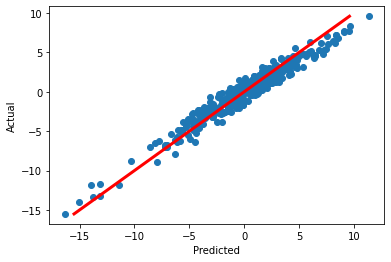

In [82]:
plt.plot(predicted[:, 0], T[:, 0], 'o')
plt.xlabel('Predicted')
plt.ylabel('Actual')
a = max(min(predicted[:, 0]), min(T[:, 0]))
b = min(max(predicted[:, 0]), max(T[:, 0]))
plt.plot([a, b], [a, b], 'r', linewidth=3)

In [83]:
print("Weather Model RMSE:", round(rmse(predicted, T),4))
weights = np.array((weatherModel1['w'][1:]))
weightDF = pd.DataFrame(weights).T
weightDF.columns = Xnames
weightDF

Weather Model RMSE: 0.9861


,tave,tmax,tmin,vp,rhmax,rhmin,pp,gust
0,-0.04354,-0.044425,-0.040074,0.012133,0.042573,0.058191,0.026665,-0.166112


As you can see our weights have changed quite a bit. None of the weights are as high as the 4 largest ones in the previous model. Relative humidity, precipitation, and gust now play much larger roles in determining the next days average temperature. The weights are used to predict the change which is then can be used to determine the next days temperature, and this is a far greater method to determine the next days temperature.

From comparing our two models, predicting the change in temperature to predict the next days temperature is far better than the first model. Our first model achieved a RMSE of 3.33 which is over 3 times higher than our second model's RMSE of 0.98. A smaller RMSE indicates that our model is predicting the next days 'tave' with a much higher accuracy. It is surprising to see that such a small change can make a huge difference in the results and accuracy of our model.